In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [9]:
pd.read_csv("/content/Mall_Customers.csv")

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [11]:
df.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [12]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.shape

(200, 5)

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [17]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
df.rename(columns={'Annual Income (k$)':'Income'},inplace=True)


In [21]:
df.rename(columns={'Spending Score (1-100)':'Spending score'},inplace=True)


In [22]:
df.head()

,Gender,Age,Income,Spending score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

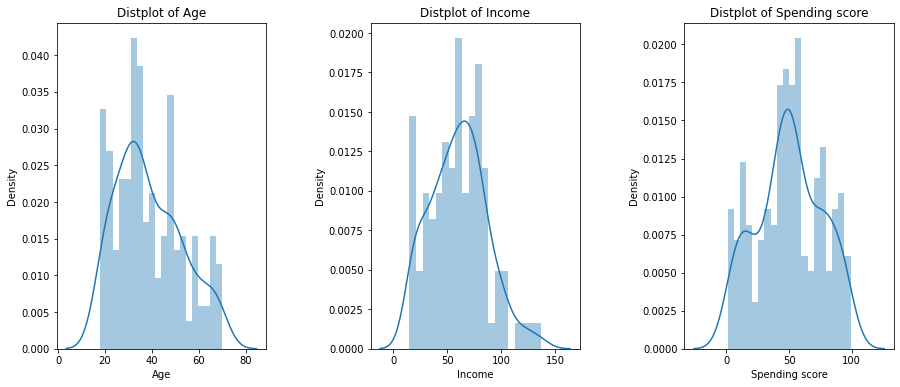

In [23]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Income', 'Spending score']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

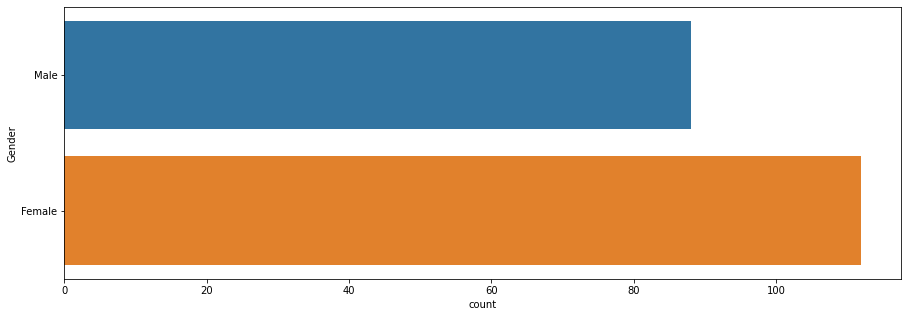

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show()

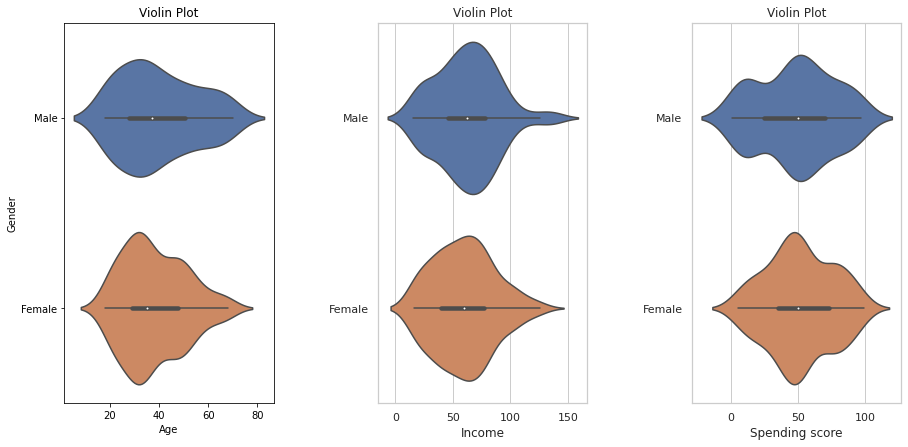

In [25]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age', 'Income', 'Spending score']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.violinplot(x=cols,y='Gender',data=df)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Violin Plot')
plt.show()

In [26]:
age_18_25 = df['Age'][(df.Age >=18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >=26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >=56]

In [29]:
agex = ["18-25","26-35","36-45","46-55","56+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

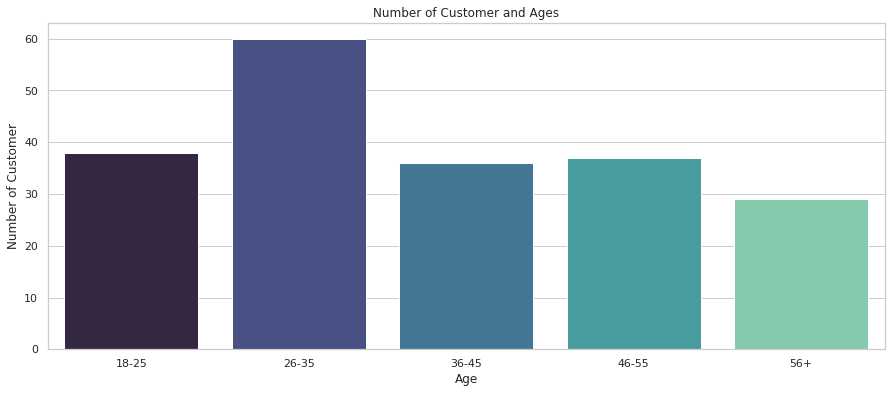

In [31]:
plt.figure(1, figsize=(15,6))                        
sns.barplot(x=agex, y=agey, palette = 'mako')
plt.title('Number of Customer and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

In [35]:
X1 = df.loc[:,['Age','Spending score']].values

In [36]:
from sklearn.cluster import KMeans

age_ss = []

for k in range(1,8):

    kmeans = KMeans(n_clusters=k, init='k-means++')

    kmeans.fit(X1)

    age_ss.append(kmeans.inertia_)


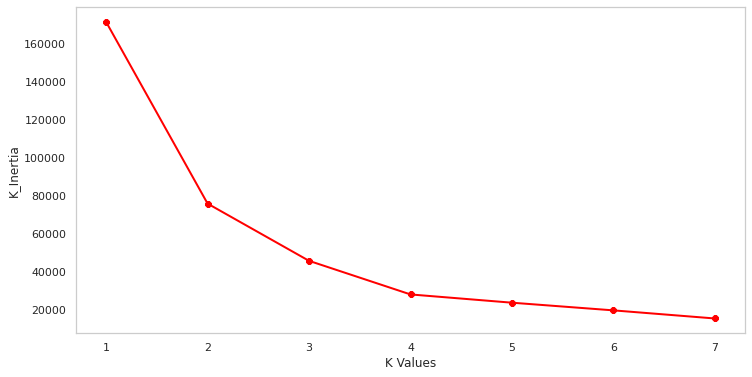

In [38]:
plt.figure(figsize=(12,6))

plt.grid()

plt.plot(range(1,8),age_ss,linewidth = 2, color = "red", marker = "8")

plt.xlabel('K Values')

plt.ylabel("K_Inertia")

plt.show()

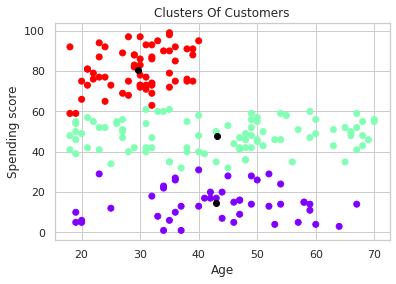

In [40]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X1)



plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color = 'black')

plt.title('Clusters Of Customers')

plt.xlabel('Age')

plt.ylabel('Spending score')

plt.show()